In [1]:
import pandas as pd, numpy as np
from fidap import fidap_client
import config

In [2]:
fidap = fidap_client(db="sf_gcp", api_key=config.FIDAP_API_KEY)

In [3]:
def factor_analysis(factor: str):
    """
    Function to return the Dataframe of percent change in share price by 10 groups based on a factor.
    """
    df = fidap.sql(f"""
    SELECT AVG("pc_1d")*100 as "return",
       "group_no"
    FROM
      (SELECT "ticker", "date", "pc_1d",
                            "{factor}",
                            NTILE(10) OVER(
                                           ORDER BY "{factor}" DESC) AS "group_no"
       FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers"
       WHERE "marketcap" > 100000000 AND "{factor}" IS NOT NULL) AS tmp
    GROUP BY "group_no"
    ORDER BY "group_no";""")
    return df

# Factor investing analysis

Market factors, such as momentum and value, ...

## Further reading

Here are some great resources on further reading around factor investing:

 - [Investopedia - Factor Investing](https://www.investopedia.com/terms/f/factor-investing.asp)
 - [Fidelity](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/fidelity/fidelity-overview-of-factor-investing.pdf)
    

## Marketcap Factor 1D Returns

Let's do a query that splits tickers into deciles based on their market cap. We can use the built in SQL function NTILE ([Snowflake docs](https://docs.snowflake.com/en/sql-reference/functions/ntile.html)). After we split the companies into deciles (called `group_no`), we then group them, take the average return at the decile level, and order by the `group_no`.

In [4]:
df_marketcap = factor_analysis('marketcap')

In [5]:
df_marketcap

,return,group_no
0,-0.522120,1
1,-1.327169,2
2,-2.003102,3
3,-2.374373,4
4,-2.637349,5
5,-2.460720,6
6,-2.539594,7
7,-2.435633,8
8,-2.250781,9
9,-2.631467,10


<AxesSubplot:xlabel='group_no'>

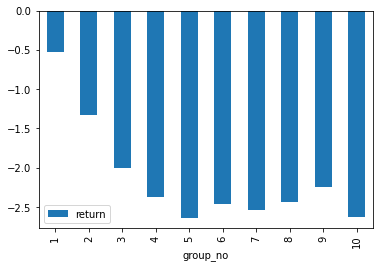

In [6]:
df_marketcap.plot.bar(x="group_no", y="return")

## Value Factor (Profit/Sales Ratio)

In [7]:
df_value = factor_analysis('ps')

In [8]:
df_value

,return,group_no
0,-3.480551,1
1,-2.267377,2
2,-2.056356,3
3,-2.041269,4
4,-1.796462,5
5,-1.728886,6
6,-1.697634,7
7,-1.802429,8
8,-2.081691,9
9,-2.117345,10


<AxesSubplot:xlabel='group_no'>

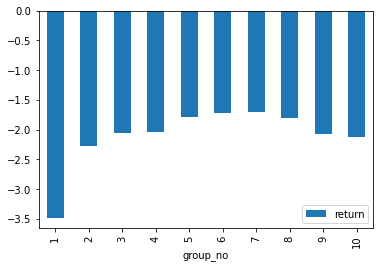

In [9]:
df_value.plot.bar(x="group_no", y="return")

## Volatility

In [10]:
df_volatility = factor_analysis('std_3m')

In [11]:
df_volatility

,return,group_no
0,-3.866344,1
1,-3.801551,2
2,-3.187571,3
3,-2.629467,4
4,-2.246286,5
5,-2.052851,6
6,-1.679018,7
7,-1.165883,8
8,-0.540121,9
9,-0.012427,10


<AxesSubplot:xlabel='group_no'>

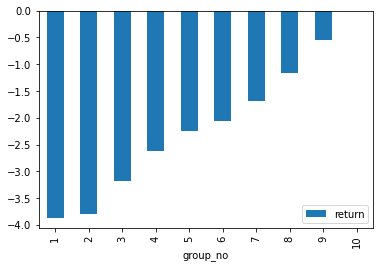

In [12]:
df_volatility.plot.bar(x="group_no", y="return")

## Momentum Factor

In [13]:
df_momentum = factor_analysis('pc_3m')

In [14]:
df_momentum

,return,group_no
0,-3.247835,1
1,-2.696473,2
2,-2.752110,3
3,-2.110512,4
4,-1.942751,5
5,-1.704591,6
6,-1.583629,7
7,-1.344047,8
8,-1.165064,9
9,-2.827030,10


<AxesSubplot:xlabel='group_no'>

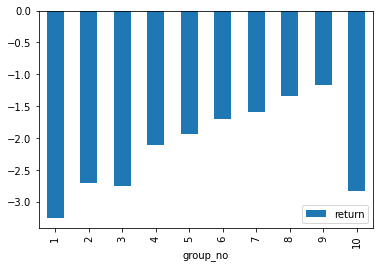

In [15]:
df_momentum.plot.bar(x="group_no", y="return")

## Profit Margin

In [16]:
df_pm = factor_analysis('netmargin')

In [17]:
df_pm

,return,group_no
0,-1.560892,1
1,-1.723048,2
2,-1.294946,3
3,-1.509409,4
4,-1.827506,5
5,-1.836612,6
6,-2.059364,7
7,-2.613360,8
8,-3.309630,9
9,-3.338665,10


<AxesSubplot:xlabel='group_no'>

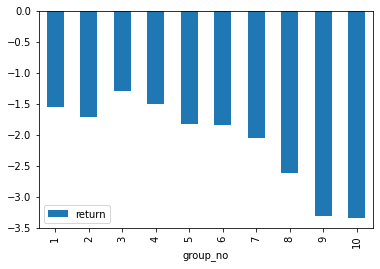

In [18]:
df_pm.plot.bar(x="group_no", y="return")

## Payout Ratio

In [19]:
df_por = factor_analysis('payoutratio')

In [20]:
df_por

,return,group_no
0,-0.968483,1
1,-1.183973,2
2,-1.423361,3
3,-2.110460,4
4,-2.833397,5
5,-2.905316,6
6,-2.640082,7
7,-3.173465,8
8,-2.936755,9
9,-1.774887,10


<AxesSubplot:xlabel='group_no'>

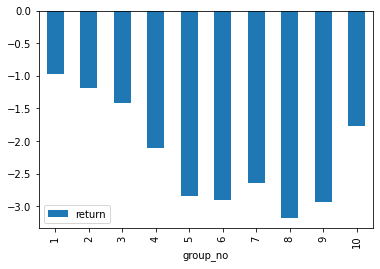

In [21]:
df_por.plot.bar(x="group_no", y="return")

## Dividend Yield

In [22]:
df_yield = factor_analysis('divyield')

In [23]:
df_yield

,return,group_no
0,-1.354431,1
1,-1.411589,2
2,-1.279317,3
3,-1.317029,4
4,-2.508517,5
5,-2.733017,6
6,-2.953124,7
7,-2.955134,8
8,-2.296785,9
9,-2.727701,10


<AxesSubplot:xlabel='group_no'>

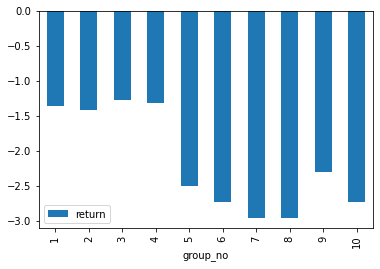

In [24]:
df_yield.plot.bar(x="group_no", y="return")

## Free Cash Flow

In [25]:
df_fcf = factor_analysis('fcf')

In [26]:
df_fcf

,return,group_no
0,-0.773261,1
1,-1.375993,2
2,-2.195953,3
3,-2.059337,4
4,-2.165770,5
5,-2.365116,6
6,-2.269149,7
7,-3.780405,8
8,-3.143133,9
9,-1.480998,10


<AxesSubplot:xlabel='group_no'>

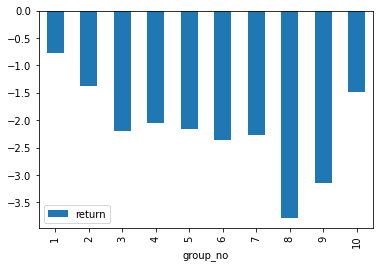

In [27]:
df_fcf.plot.bar(x="group_no", y="return")